In [66]:
import pandas as pd
from pandas import Series, DataFrame

In [67]:
titanic_df = pd.read_csv("train.csv")

## Preview of the data

In [68]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [69]:
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


#### Let us ask some basic questions

In [70]:
## Who were the passengers on the titanic? 

In [71]:
## Let's import all we need for data analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##Following command ensures we can see everything in the notebook
%matplotlib inline


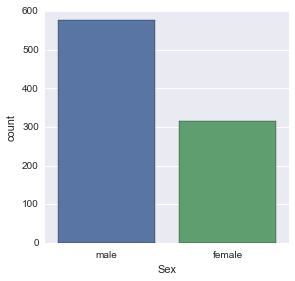

In [72]:
## Who were the passengers?
## How many Men vs Women in the Passengers
sns.factorplot('Sex',data=titanic_df, kind='count')

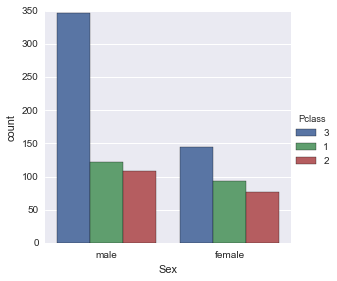

In [73]:
## Separate the gender by classes

##plot shows most of the men were in 3rd class
sns.factorplot('Sex',data=titanic_df,kind='count',hue='Pclass')

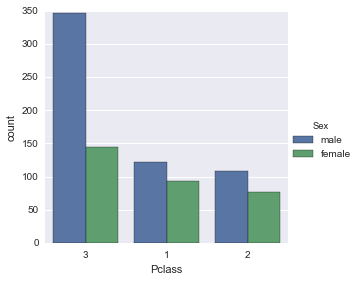

In [74]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Sex')
## Below plot shows that much of the third class were men

In [75]:
##Lecture 45
## defining a new column
def male_female_child(passenger):
    age,sex = passenger
    
    if age<16 :
        return 'child'
    else:
        return sex

In [76]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [77]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


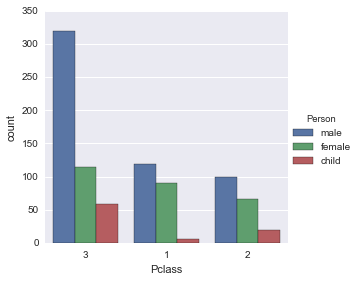

In [78]:
sns.factorplot('Pclass',data=titanic_df,hue='Person',kind='count')

## Interestingly, lot of children in the 3rd class!

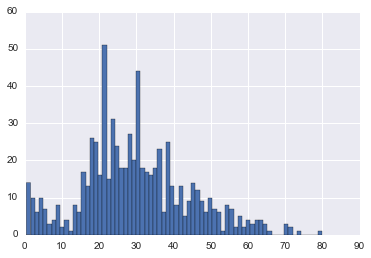

In [79]:
## Distribution of Ages 
titanic_df['Age'].hist(bins=70)

In [80]:
titanic_df['Age'].mean()

29.69911764705882

In [81]:
#How many men vs women vs children? 
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

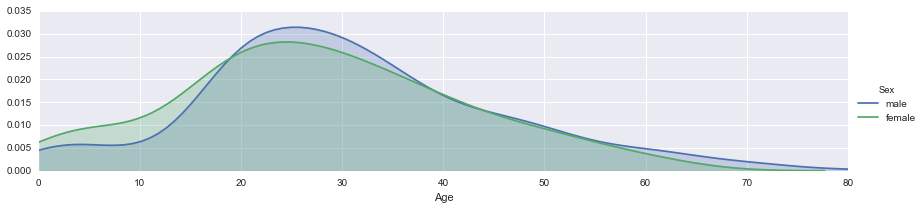

In [82]:
## Age Distribution for Men vs Women 
## use Facet Grid when you want to overlap plot

fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,"Age",shade="True")

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

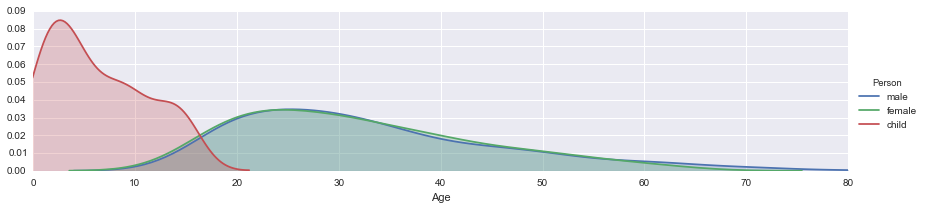

In [83]:
## Age Distribution for Men vs Women vs Child
## use Facet Grid when you want to overlap plot

fig = sns.FacetGrid(titanic_df,hue='Person',aspect=4)
fig.map(sns.kdeplot,"Age",shade="True")

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

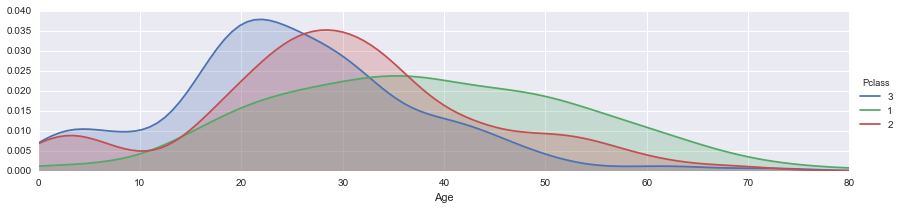

In [84]:
## Age Distribution based on class


fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,"Age",shade="True")

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [85]:
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [88]:
## We would like to determine if cabin had any effect on survival rate
deck = titanic_df['Cabin'].dropna()

In [89]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

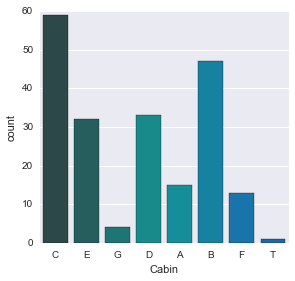

In [96]:
levels = []
for level in deck:
    levels.append(level[0])

# Make a Data Frame
cabin_df = DataFrame(levels)
# Add a column to the Data frame
cabin_df.columns = ["Cabin"]
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

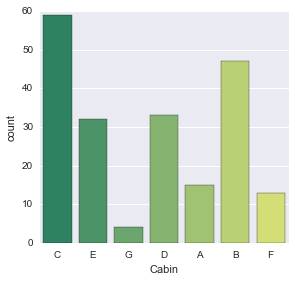

In [99]:
# In above plot, T doesn't make any sense, so lets get rid of it

cabin_df = cabin_df[cabin_df.Cabin !='T']
sns.factorplot('Cabin',data=cabin_df,palette='summer',kind='count')


In [100]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


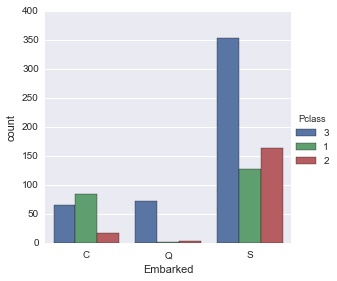

In [102]:
# Where did people come from? 
sns.factorplot('Embarked',data=titanic_df,kind='count',hue='Pclass',order=['C','Q','S'])
#Did certain cities have lot of 3rd class people and so one

In [103]:
#Who was alone? Who was with family?
#Sib = sibling
#Parch = parents or children on board

# alone = Sibsp = 0 && Parch == 0

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [104]:
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,0


In [105]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [107]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'


/Users/sangeethaunni/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  def __setitem__(self, key, value):


In [108]:
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [109]:
titanic_df['Alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
5            Alone
6            Alone
7      With Family
8      With Family
9      With Family
10     With Family
11           Alone
12           Alone
13     With Family
14           Alone
15           Alone
16     With Family
17           Alone
18     With Family
19           Alone
20           Alone
21           Alone
22           Alone
23           Alone
24     With Family
25     With Family
26           Alone
27     With Family
28           Alone
29           Alone
          ...     
861    With Family
862          Alone
863    With Family
864          Alone
865          Alone
866    With Family
867          Alone
868          Alone
869    With Family
870          Alone
871    With Family
872          Alone
873          Alone
874    With Family
875          Alone
876          Alone
877          Alone
878          Alone
879    With Family
880    With Family
881          Alone
882         

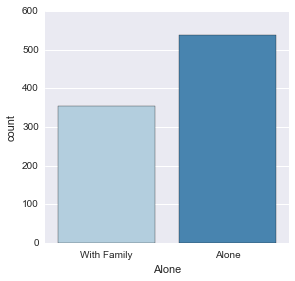

In [111]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count')

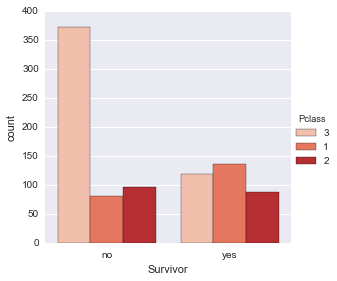

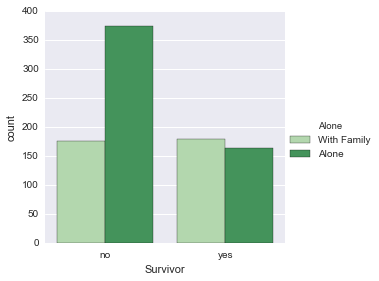

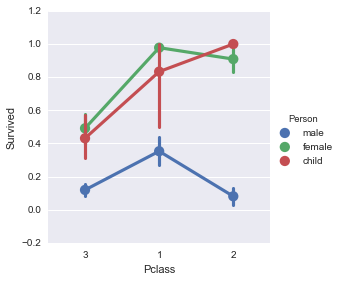

In [133]:
# What factors help someone survive 
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})
sns.factorplot('Survivor',kind='count',data=titanic_df,palette="Reds",hue='Pclass')
sns.factorplot('Survivor',kind='count',data=titanic_df,palette="Greens",hue='Alone')

# More meaningful .. 
sns.factorplot('Pclass','Survived',hue='Person',data=titanic_df)

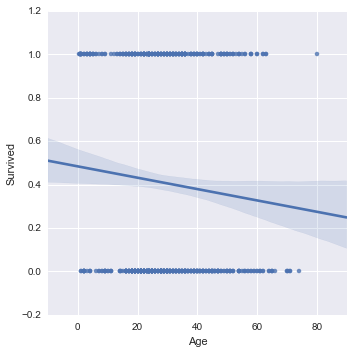

In [136]:
sns.lmplot('Age','Survived',data=titanic_df)

# General trend - older less likely to survive

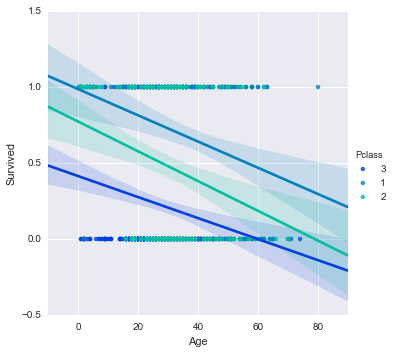

In [137]:
sns.lmplot('Age','Survived', hue='Pclass', data=titanic_df,palette='winter')

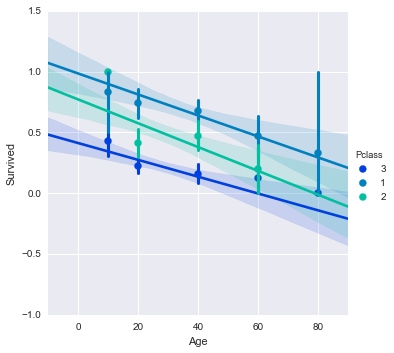

In [138]:
# Binning the Ages 
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived', hue='Pclass', data=titanic_df,palette='winter',x_bins=generations)

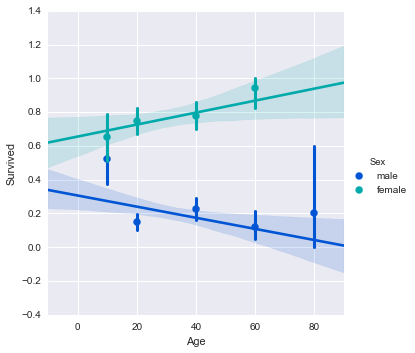

In [140]:
sns.lmplot('Age','Survived', hue='Sex', data=titanic_df,palette='winter',x_bins=generations)
# older women had better chance of survivability

In [154]:
# Did deck have an effect of survival rate?
def decklevel(cabin):
    deck = cabin
    for level in deck:
        levels = level[0]
        return levels

titanic_df['deck'] = titanic_df['Cabin'].dropna().apply(decklevel) 
titanic_df['deck']
#removing the T enntry

titanic_df = titanic_df[titanic_df.Cabin != 'T']

/Users/sangeethaunni/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


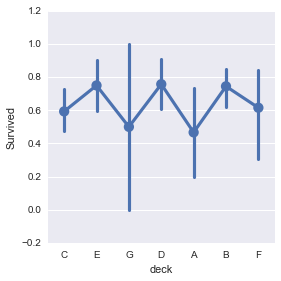

In [155]:
sns.factorplot('deck','Survived',data=titanic_df)

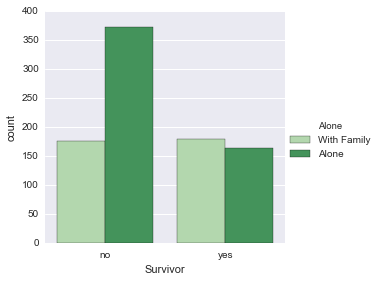

In [158]:
# Did Family member increase odd of survival? 
#titanic_df.head()
sns.factorplot('Survivor',kind='count',data=titanic_df,palette="Greens",hue='Alone')